In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.neural_network
import sklearn.model_selection
import sklearn.metrics
import seaborn as sns
import copy
import pickle

In [2]:
X = np.load("X.npy")
t = np.load("y.npy")

(array([698.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 979.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

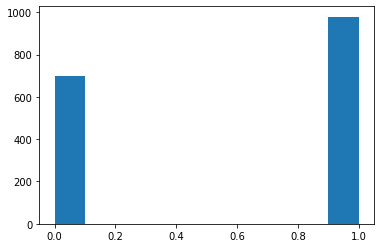

In [3]:
plt.hist(t)

Fold 1 of 5:
Iteration 1, loss = 0.73733176
Iteration 2, loss = 0.61762047
Iteration 3, loss = 0.55356630
Iteration 4, loss = 0.51558595
Iteration 5, loss = 0.49477654
Iteration 6, loss = 0.48402225
Iteration 7, loss = 0.47641170
Iteration 8, loss = 0.46963210
Iteration 9, loss = 0.46668311
Iteration 10, loss = 0.45681863
Iteration 11, loss = 0.45092772
Iteration 12, loss = 0.44279043
Iteration 13, loss = 0.43258642
Iteration 14, loss = 0.42283600
Iteration 15, loss = 0.41445114
Iteration 16, loss = 0.40625393
Iteration 17, loss = 0.39864186
Iteration 18, loss = 0.39225168
Iteration 19, loss = 0.38625940
Iteration 20, loss = 0.38008929
Iteration 21, loss = 0.37265568
Iteration 22, loss = 0.36614082
Iteration 23, loss = 0.35862726
Iteration 24, loss = 0.35106127
Iteration 25, loss = 0.34576345
Iteration 26, loss = 0.33908101
Iteration 27, loss = 0.33307493
Iteration 28, loss = 0.32670768
Iteration 29, loss = 0.32156315
Iteration 30, loss = 0.31629449
Iteration 31, loss = 0.31147851
Iter

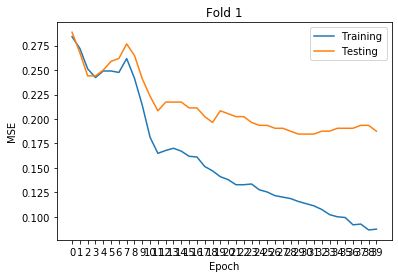

Fold 2 of 5:
Iteration 1, loss = 0.71683180
Iteration 2, loss = 0.60082892
Iteration 3, loss = 0.54109483
Iteration 4, loss = 0.50902197
Iteration 5, loss = 0.48906132
Iteration 6, loss = 0.47210863
Iteration 7, loss = 0.45979485
Iteration 8, loss = 0.45009502
Iteration 9, loss = 0.43450239
Iteration 10, loss = 0.42616242
Iteration 11, loss = 0.41666868
Iteration 12, loss = 0.40731915
Iteration 13, loss = 0.39642939
Iteration 14, loss = 0.38845125
Iteration 15, loss = 0.37709360
Iteration 16, loss = 0.37967007
Iteration 17, loss = 0.34896916
Iteration 18, loss = 0.35278866
Iteration 19, loss = 0.33552746
Iteration 20, loss = 0.32335765
Iteration 21, loss = 0.31788250
Iteration 22, loss = 0.30513725
Iteration 23, loss = 0.30082474
Iteration 24, loss = 0.28920329
Iteration 25, loss = 0.28502820
Iteration 26, loss = 0.27575741
Iteration 27, loss = 0.26908213
Iteration 28, loss = 0.26271372
Iteration 29, loss = 0.25430070
Iteration 30, loss = 0.24911710
Iteration 31, loss = 0.24150516
Iter

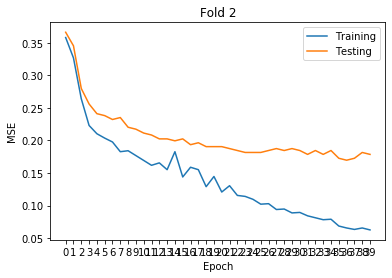

Fold 3 of 5:
Iteration 1, loss = 0.72808836
Iteration 2, loss = 0.60319056
Iteration 3, loss = 0.53564895
Iteration 4, loss = 0.49249397
Iteration 5, loss = 0.46989475


KeyboardInterrupt: 

In [4]:
number_of_folds = 5
best_acc = 99999
best_mlp = None
kf = sklearn.model_selection.StratifiedKFold(number_of_folds, shuffle=True, random_state=1)
for fold, (train_index, test_index) in enumerate(kf.split(X, t)):
    print(f"Fold {fold+1} of {number_of_folds}:")
    mlp = sklearn.neural_network.MLPClassifier(
        [100, 50, 50], 
        activation='relu',
        learning_rate='adaptive',
        random_state=1,
        solver='adam',
        learning_rate_init=0.0001,
        tol=0.00001,
        verbose=True
    )
    X_train, t_train = X[train_index], t[train_index]
    X_test, t_test = X[test_index], t[test_index]
    epochs = []
    mse_train = []
    mse_test = []
    for epoch in range(40):
        mlp.partial_fit(
            X_train, 
            t_train, 
            [0, 1]
        )
        """
        for indx in range(0, len(t_test), 200):
            mlp.partial_fit(
                X_train[indx:min(len(t_test), indx + 200)], 
                t_train[indx:min(len(t_test), indx + 200)], 
                [0, 1]
            )
        """
        epochs.append(epoch)
        mse_train.append(np.mean(np.power(t_train - mlp.predict(X_train), 2)))
        mse_test.append(np.mean(np.power(t_test - mlp.predict(X_test), 2)))
    plt.figure()
    plt.plot(epochs, mse_train, label="Training")
    plt.plot(epochs, mse_test, label="Testing")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.title(f"Fold {fold + 1}")
    plt.xticks(epochs)
    plt.legend()
    plt.show()